In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def multivariate_gaussian(X, mu, var):
    """
    Computes the probability 
    density function of the examples X under the multivariate gaussian 
    distribution with parameters mu and var. If var is a matrix, it is
    treated as the covariance matrix. If var is a vector, it is treated
    as the var values of the variances in each dimension (a diagonal
    covariance matrix
    """
    
    k = len(mu)
    
    if var.ndim == 1:
        var = np.diag(var)
        
    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    
    return p

In [9]:

df = pd.read_csv("login_data.csv")

# Separate features and labels
X = df[['login_count', 'login_duration']].values
y_val = df['is_anomaly'].values  # 0 = normal, 1 = anomaly


In [2]:
def estimate_gaussian(X):
    mu = np.mean(X, axis=0)
    var = np.var(X, axis=0)
    return mu, var

def select_threshold(y_val, p_val):
    best_epsilon = 0
    best_F1 = 0
    step = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step):
        preds = (p_val < epsilon).astype(int)
        tp = np.sum((preds == 1) & (y_val == 1))
        fp = np.sum((preds == 1) & (y_val == 0))
        fn = np.sum((preds == 0) & (y_val == 1))

        if tp + fp == 0 or tp + fn == 0:
            continue

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        F1 = 2 * precision * recall / (precision + recall)

        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon

    return best_epsilon, best_F1


In [6]:
mu, var = estimate_gaussian(X)
p = multivariate_gaussian(X, mu, var)


In [7]:
# Use the same data for "validation"
p_val = p.copy()
epsilon, F1 = select_threshold(y_val, p_val)

print("Best epsilon:", epsilon)
print("Best F1 score:", F1)


Best epsilon: 5.384790637018417e-06
Best F1 score: 1.0


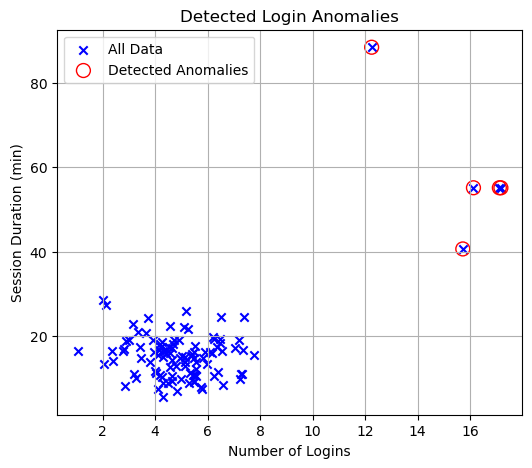

In [8]:
outliers = p_val < epsilon

plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], marker='x', c='blue', label='All Data')
plt.scatter(X[outliers, 0], X[outliers, 1], facecolors='none', edgecolors='r', s=100, label='Detected Anomalies')
plt.title("Detected Login Anomalies")
plt.xlabel("Number of Logins")
plt.ylabel("Session Duration (min)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# def estimate_gaussian(X):

 

In [ ]:
# def select_threshold(y_val, p_val): 

